Que. 2

Perform K-Means,Hierarchical and DBSCAN Clustering for the crime_data.csv data and identify the number of clusters formed and Visualise the results.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [40]:
import warnings 
warnings.filterwarnings('ignore')

In [41]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("crime_data.csv")

In [43]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [44]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [45]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [57]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
clusters_info = kmeans.fit(df)

In [58]:
clusters_info.labels_

array([0, 2, 2, 0, 2, 0, 3, 0, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 4, 2,
       1, 2, 4, 3, 3, 2, 1, 4, 2, 2, 2, 1, 3, 4, 4, 3, 4, 2, 1, 0, 0, 3,
       1, 4, 4, 1, 1, 4], dtype=int32)

In [59]:
# find the cluster centroids
clusters_info.cluster_centers_

array([[ 11.3       , 209.71428571,  65.28571429,  24.77142857],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 12.13571429, 277.64285714,  68.78571429,  29.78571429],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  6.11111111, 159.11111111,  73.55555556,  20.37777778]])

In [60]:
# find the number of clusters
len(clusters_info.cluster_centers_)

5

In [61]:
# find the number of iterations needed to find the final clusters
clusters_info.n_iter_

3

Text(0.5, 1.0, 'Clusters')

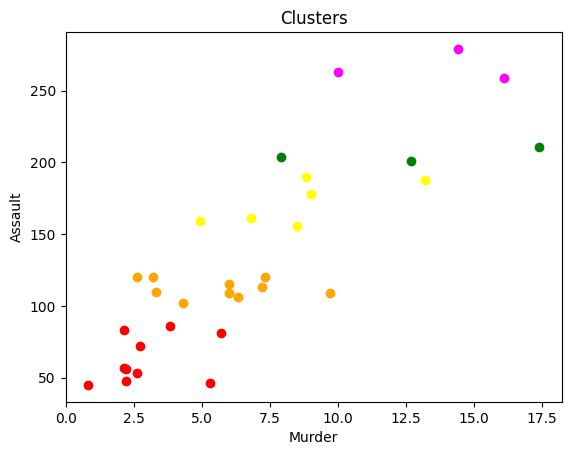

In [66]:
plt.scatter(df['Murder'][clusters_info.labels_ == 0], df['Assault'][clusters_info.labels_ == 0], color="red")
plt.scatter(df['Murder'][clusters_info.labels_ == 1], df['Assault'][clusters_info.labels_ == 1], color="green")
plt.scatter(df['Murder'][clusters_info.labels_ == 2], df['Assault'][clusters_info.labels_ == 2], color="yellow")
plt.scatter(df['Murder'][clusters_info.labels_ == 3], df['Assault'][clusters_info.labels_ == 3], color="magenta")
plt.scatter(df['Murder'][clusters_info.labels_ == 4], df['Assault'][clusters_info.labels_ == 4], color="orange")
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.title("Clusters")

In [63]:
from sklearn.cluster import KMeans

# create a list to get the within sum of squares for difrerent no of clusters
wss = []

# create a loop to find the wss for different no of clusters
for k in range(1, 10):

    # create KMeans object
    kmeans = KMeans(n_clusters=k)

    # fit the data
    clusters_info = kmeans.fit(df)

    # collect the wss for k
    wss.append(clusters_info.inertia_)

In [64]:

wss

[355807.8216,
 96399.02814449917,
 47964.26535714286,
 37036.80255742297,
 24504.9527032967,
 18875.46422222222,
 17733.57704761905,
 15753.9226984127,
 12950.328642857143]

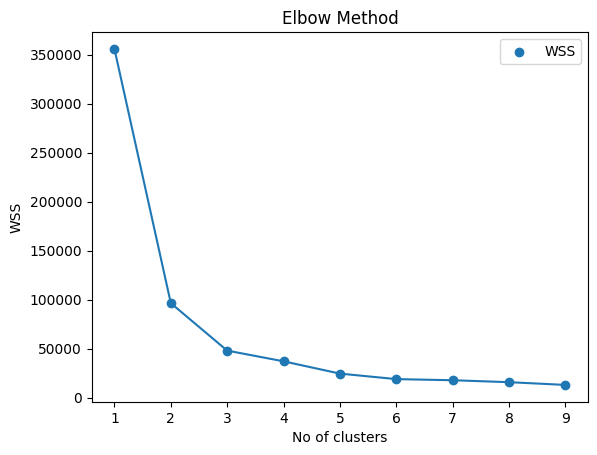

In [65]:
plt.scatter(range(1, 10), wss, label="WSS")
plt.plot(range(1, 10), wss)
plt.xlabel("No of clusters")
plt.ylabel("WSS")
plt.title("Elbow Method")
plt.legend()